In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exercice 9.1 - Population de bactérie

In [4]:
data_df = pd.read_csv('Bacterie.csv', sep=';')
data_df

,nHeure,population
0,0,32
1,1,47
2,2,65
3,3,92
4,4,132
5,5,190
6,6,275


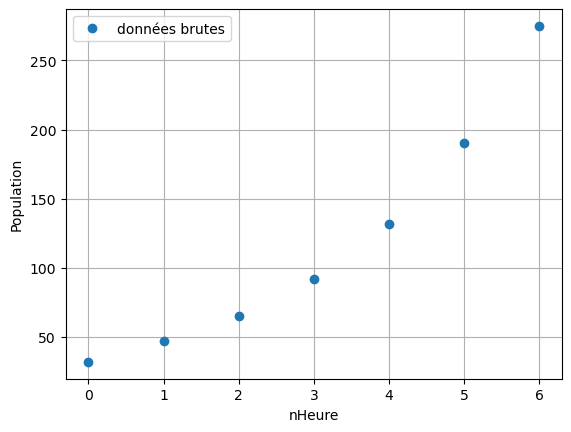

In [5]:
plt.plot(data_df['nHeure'], data_df['population'],'o', label='données brutes')
plt.xlabel('nHeure')
plt.ylabel('Population')
plt.grid()
plt.legend()
plt.show()

In [24]:
data_df[['nHeure','population']].cov()

,nHeure,population
nHeure,4.666667,180.333333
population,180.333333,7657.333333


In [30]:
data_df[['nHeure','population']].cov()['nHeure']['population']

180.33333333333331

In [32]:
data_df[['nHeure','population']].cov()['nHeure']['nHeure']

4.666666666666666

In [36]:
a = data_df[['nHeure','population']].cov()['nHeure']['population']/data_df[['nHeure','population']].cov()['nHeure']['nHeure']
b = data_df['population'].mean() - a*data_df['nHeure'].mean()

a, b

(38.642857142857146, 3.071428571428555)

In [40]:
data_df['Modèle linéaire'] = data_df.apply(lambda r:a*r['nHeure']+b, axis=1)

data_df

,nHeure,population,Y,Modèle linéaire
0,0,32,3.465736,3.071429
1,1,47,3.850148,41.714286
2,2,65,4.174387,80.357143
3,3,92,4.521789,119.000000
4,4,132,4.882802,157.642857
5,5,190,5.247024,196.285714
6,6,275,5.616771,234.928571


In [6]:
import math

data_df['Y'] = data_df.apply(lambda r:math.log(r['population']), axis=1)
data_df

,nHeure,population,Y
0,0,32,3.465736
1,1,47,3.850148
2,2,65,4.174387
3,3,92,4.521789
4,4,132,4.882802
5,5,190,5.247024
6,6,275,5.616771


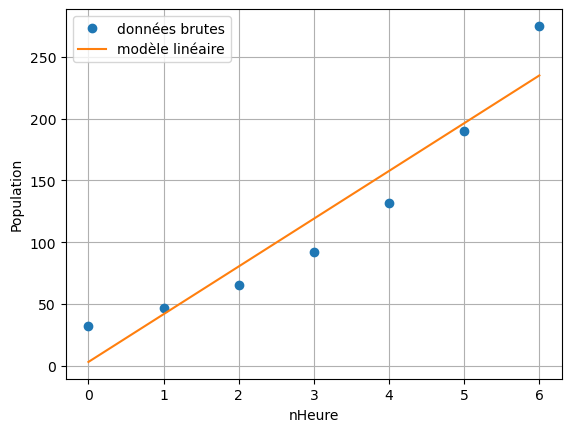

In [44]:
plt.plot(data_df['nHeure'], data_df['population'],'o', label='données brutes')
plt.plot(data_df['nHeure'], data_df['Modèle linéaire'], '-', label='modèle linéaire')
plt.xlabel('nHeure')
plt.ylabel('Population')
plt.grid()
plt.legend()
plt.show()

In [46]:
data_df['résidu'] = data_df.apply(lambda r:r['Modèle linéaire']-r['population'], axis=1)

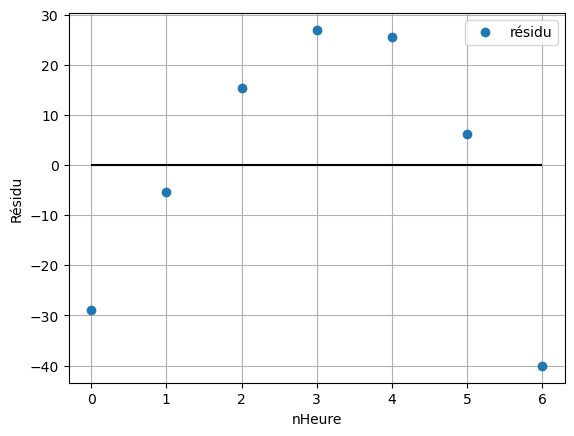

In [56]:
plt.xlabel('nHeure')
plt.ylabel('Résidu')
plt.plot(data_df['nHeure'], data_df['résidu'], 'o', label='résidu')
plt.hlines(0, data_df['nHeure'].min(), data_df['nHeure'].max(), color='black')
plt.grid()
plt.legend()
plt.show()

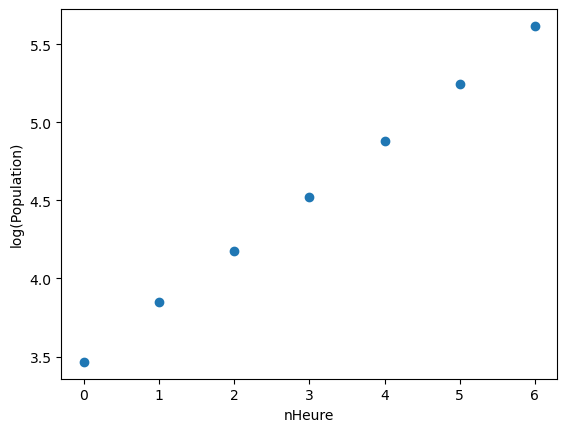

In [7]:
plt.plot(data_df['nHeure'], data_df['Y'],'o')
plt.xlabel('nHeure')
plt.ylabel('log(Population)')
plt.show()

In [58]:
aa = data_df[['nHeure','Y']].cov()['nHeure']['Y']/data_df[['nHeure','Y']].cov()['nHeure']['nHeure']
bb = data_df['Y'].mean() - aa*data_df['nHeure'].mean()

aa, bb

(0.35554547064971875, 3.4703145086033986)

In [60]:
data_df['Modèle linéaire dans espace logarithmique'] = data_df.apply(lambda r:aa*r['nHeure']+bb, axis=1)

data_df

,nHeure,population,Y,Modèle linéaire,résidu,Modèle linéaire dans espace logarithmique
0,0,32,3.465736,3.071429,-28.928571,3.470315
1,1,47,3.850148,41.714286,-5.285714,3.825860
2,2,65,4.174387,80.357143,15.357143,4.181405
3,3,92,4.521789,119.000000,27.000000,4.536951
4,4,132,4.882802,157.642857,25.642857,4.892496
5,5,190,5.247024,196.285714,6.285714,5.248042
6,6,275,5.616771,234.928571,-40.071429,5.603587


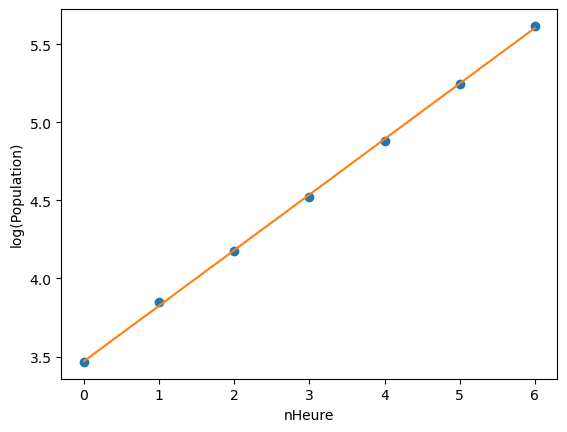

In [62]:
plt.plot(data_df['nHeure'], data_df['Y'],'o')
plt.plot(data_df['nHeure'], data_df['Modèle linéaire dans espace logarithmique'], '-', label='modèle linéaire')
plt.xlabel('nHeure')
plt.ylabel('log(Population)')
plt.show()

In [64]:
data_df['modèle non linéaire'] = data_df.apply(lambda r:math.exp(r['Modèle linéaire dans espace logarithmique']), axis=1)

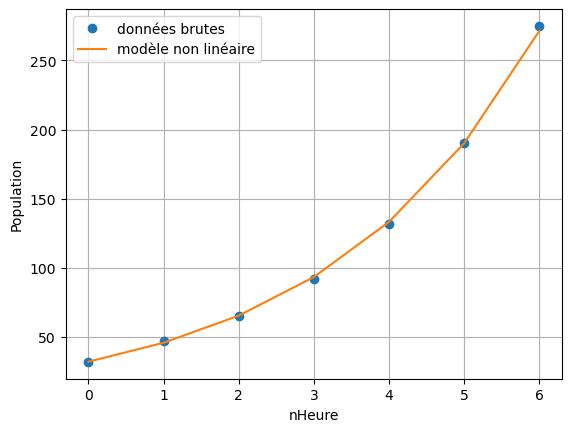

In [66]:
plt.plot(data_df['nHeure'], data_df['population'],'o', label='données brutes')
plt.plot(data_df['nHeure'], data_df['modèle non linéaire'], '-', label='modèle non linéaire')
plt.xlabel('nHeure')
plt.ylabel('Population')
plt.grid()
plt.legend()
plt.show()

In [70]:
data_df['résidu modèle non linéaire'] = data_df.apply(lambda r:r['modèle non linéaire']-r['population'], axis=1)

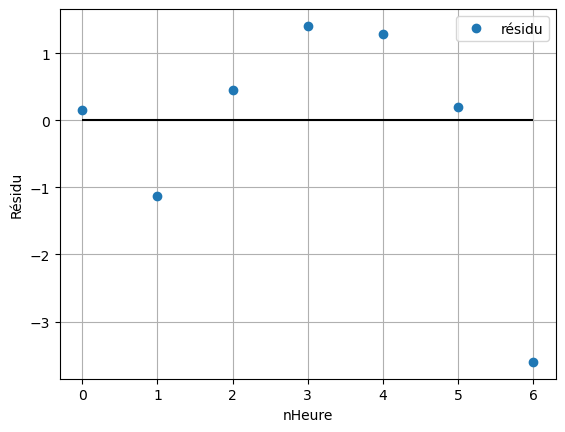

In [72]:
plt.xlabel('nHeure')
plt.ylabel('Résidu')
plt.plot(data_df['nHeure'], data_df['résidu modèle non linéaire'], 'o', label='résidu')
plt.hlines(0, data_df['nHeure'].min(), data_df['nHeure'].max(), color='black')
plt.grid()
plt.legend()
plt.show()